In [3]:
import gym
import numpy as np 
import time
import matplotlib.pyplot as plt
import random
env = gym.make('MiniGrid-Empty-6x6-v0')
env.reset()



rwds = []




no_of_steps = 165
no_of_episode = 150
epsilon = 1.0
gamma = 0.98
alpha = 0.3
n_action = 3
destn = (4, 4)


Q_sa = {}
for x in range(1, 6):
    for y in range(1, 6):
        for d in range(4):  # Directions
            Q_sa[((x, y), d)] = {a: 0 for a in range(n_action)}





def TakeAction(actn):
    obs, reward, done, maxStepsReachedc, _ = env.step(actn)
    next_state = (env.agent_pos, obs['direction'])
    return reward, next_state, done





def eps_greedy(epsilon, state):
    if np.random.rand() < epsilon:
        # Exploring
        action = np.random.randint(0, n_action)
    else:
        # Greedy
        action = max(Q_sa[state], key=Q_sa[state].get)
    return action





sts = []

for episode in range(no_of_episode):
    env.reset()
    state = ((1,1),0)
    Gt = 0
    steps = 0 
    epsilon = max(0.1, epsilon * 0.99)
    for steps in range(no_of_steps):
        action = eps_greedy(epsilon, state)
        reward,next_state,done = TakeAction(action)
        Q_sa[state][action] += alpha * (reward + gamma * max(Q_sa[next_state].values()) - Q_sa[state][action])
        state = next_state
        steps+=1
        Gt+=reward
        if done:
            
            break

    rwds.append(Gt)
    sts.append(steps)


print(rwds)




[0, 0.75625, 0.7125, 0, 0.79375, 0, 0.6812499999999999, 0, 0.69375, 0.51875, 0.475, 0.925, 0.6812499999999999, 0.5125, 0.81875, 0.7875, 0.74375, 0.49375, 0.5062499999999999, 0.775, 0.44999999999999996, 0.66875, 0.60625, 0.65625, 0.70625, 0.6499999999999999, 0.86875, 0.78125, 0.61875, 0.4125, 0.79375, 0.38125, 0.7625, 0.7625, 0.9, 0.775, 0.775, 0.875, 0.8375, 0.75, 0.79375, 0.7, 0.56875, 0.875, 0.85625, 0.875, 0.85625, 0.69375, 0.9375, 0.9125, 0.81875, 0.90625, 0.9125, 0.875, 0.91875, 0.8875, 0.9125, 0.925, 0.875, 0.8875, 0.88125, 0.93125, 0.925, 0.84375, 0.925, 0.88125, 0.9375, 0.95, 0.9125, 0.8375, 0.825, 0.93125, 0.9125, 0.925, 0.90625, 0.9125, 0.925, 0.91875, 0.8875, 0.89375, 0.86875, 0.95, 0.925, 0.90625, 0.83125, 0.9375, 0.8625, 0.85625, 0.90625, 0.9375, 0.83125, 0.875, 0.93125, 0.95, 0.9375, 0.9375, 0.9125, 0.925, 0.9125, 0.9375, 0.925, 0.9375, 0.8875, 0.925, 0.9375, 0.9375, 0.9125, 0.925, 0.95, 0.91875, 0.95, 0.9375, 0.9375, 0.95, 0.9375, 0.925, 0.93125, 0.94375, 0.95, 0.925, 0.

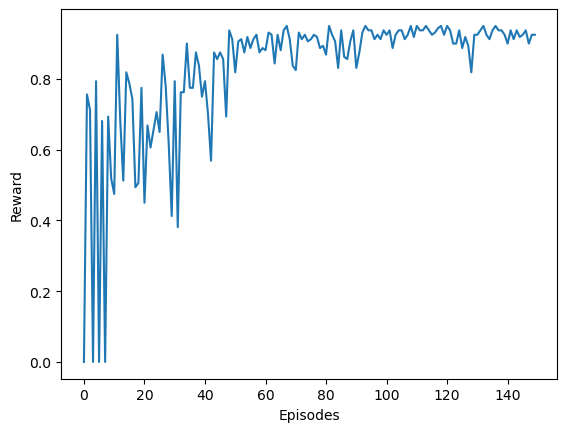

In [4]:
plt.plot(rwds)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.show()

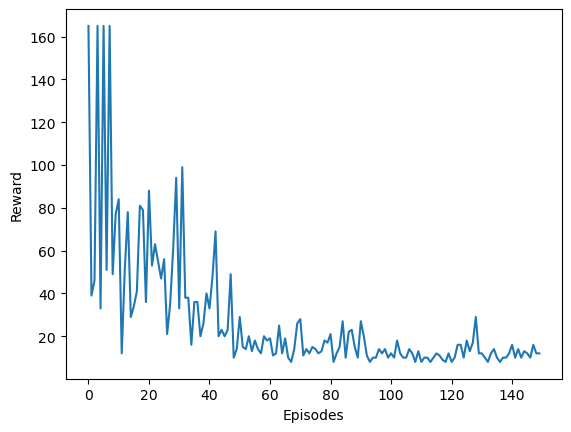

In [5]:
plt.plot(sts)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.show()


SyntaxError: incomplete input (171239341.py, line 4)